<b>Задача:</b> Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Импортируем файлы

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
for df in [query_1, query_3]:
    display(df)
    print('_ _'*12)
    display(df.info())
    print('Дубликатов =', df.duplicated().sum())
    print('_ _'*12)
    display(df.describe())
    print('*'*120)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


_ __ __ __ __ __ __ __ __ __ __ __ _
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

Дубликатов = 0
_ __ __ __ __ __ __ __ __ __ __ __ _


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


************************************************************************************************************************


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


_ __ __ __ __ __ __ __ __ __ __ __ _
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

Дубликатов = 0
_ __ __ __ __ __ __ __ __ __ __ __ _


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


************************************************************************************************************************


- Типы данных в датасетах корректны.
- Пропусков нет.
- Дублей нет.

 #### Выберем топ-10 городов по количеству рейсов;

In [4]:
(query_3
 .sort_values('average_flights', ascending = False)
 .head(10)
 .style
 .background_gradient(cmap="Greens")
)

,city,average_flights
43,Москва,129.774
70,Санкт-Петербург,31.1613
54,Новосибирск,17.3226
33,Красноярск,11.5806
20,Екатеринбург,11.3226
67,Ростов-на-Дону,10.1935
63,Пермь,10.129
10,Брянск,10
74,Сочи,9.6129
84,Ульяновск,9.58065


- Первое место по количеству прилетов ожидаемо занимает Москва. Второе место - Санкт-Петербург.
- Далее идут другие города-миллионики.
- Затем, потеснив другие миллионики, Брянск, Сочи, Ульяновск. Предположительно, это города, которые являются экономическими, транспортными (логистическими) буферами.

 #### Построим график "Модели самолётов и количество рейсов"

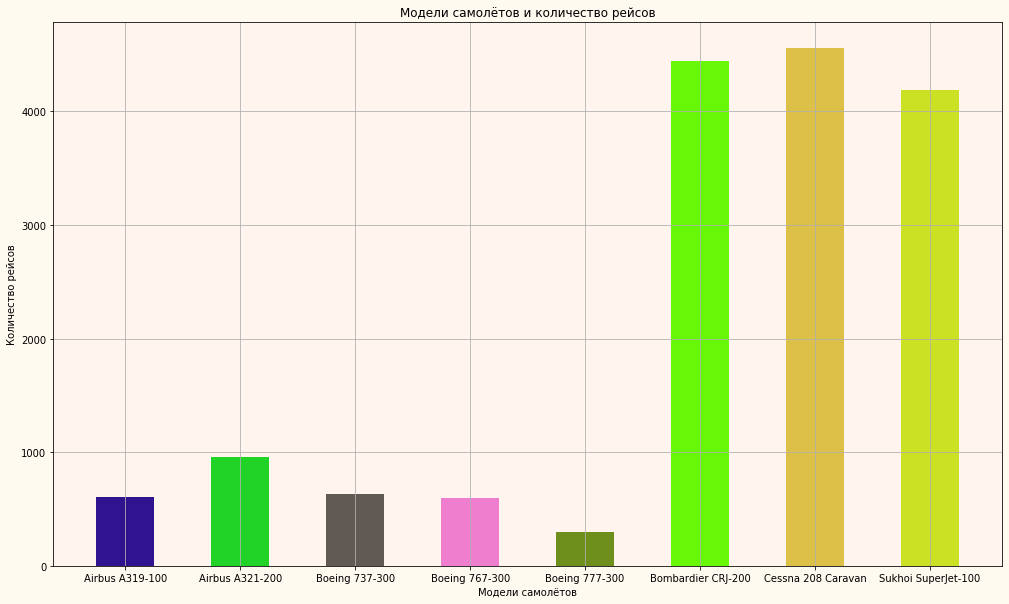

In [5]:
x = query_1['model']
y = query_1['flights_amount']\

fig, ax = plt.subplots()

color_rectangle = np.random.rand(10, 3) 
ax.bar(x, y, color = color_rectangle, width = 0.5)

fig.set_figwidth(17)
fig.set_figheight(10) 

fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.title('Модели самолётов и количество рейсов')
plt.xlabel('Модели самолётов')
plt.ylabel('Количество рейсов')

plt.grid()
plt.show()

- Региональные, ближнемагистральные пассажирские самолёты с меньшей вместимостью делают рейсов значительно больше.
- Пассажирские самолёты с большей вместимостью для совершения полётов средней и большой протяжённости делают рейсов меньше.
- У Airbus и Boeing суммарно паритет по количеству рейсов.
- Предположу, что также влияет стоимость покупки и содержания каждой модели самолёта.

#### Построим график "Города и количество рейсов"

Для наглядности графика, откинем топ-3 города: <b>Москва, Санкт-Петербург и Новосибирск</b>.

In [6]:
all_cities_without_Moscow_SPB = query_3.sort_values(by = 'average_flights', ascending = True).head(98)
all_cities_without_Moscow_SPB

,city,average_flights
8,Благовещенск,1.000000
1,Анадырь,1.000000
31,Комсомольск-на-Амуре,1.000000
76,Стрежевой,1.000000
49,Нефтеюганск,1.000000
...,...,...
10,Брянск,10.000000
63,Пермь,10.129032
67,Ростов-на-Дону,10.193548
20,Екатеринбург,11.322581


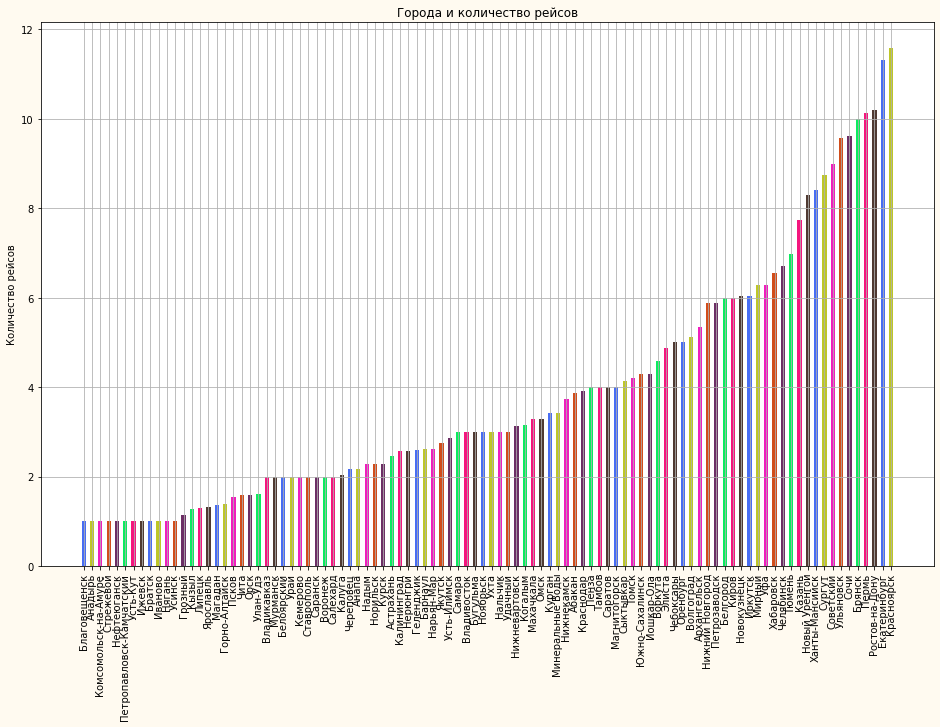

In [7]:
x = all_cities_without_Moscow_SPB['city']
y = all_cities_without_Moscow_SPB['average_flights']


fig, ax = plt.subplots()

color_rectangle = np.random.rand(8, 3) 
ax.bar(x, y, color = color_rectangle, width = 0.5)
plt.xticks(rotation='vertical')

fig.set_figwidth(16)
fig.set_figheight(10) 

fig.set_facecolor('floralwhite')

plt.title('Города и количество рейсов')
plt.ylabel('Количество рейсов')

plt.grid()
plt.show()

Предположительно, количество рейсов зависит от населения и экономической развитости региона. Также значение имеет транспортная инфраструктура в регионе. Однако таких данных для анализа в исходных датасетах нет.

#### Построим график "Топ-10 городов и количество рейсов"

In [8]:
top10_cities = query_3.sort_values(by = 'average_flights', ascending = False).head(10)
top10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


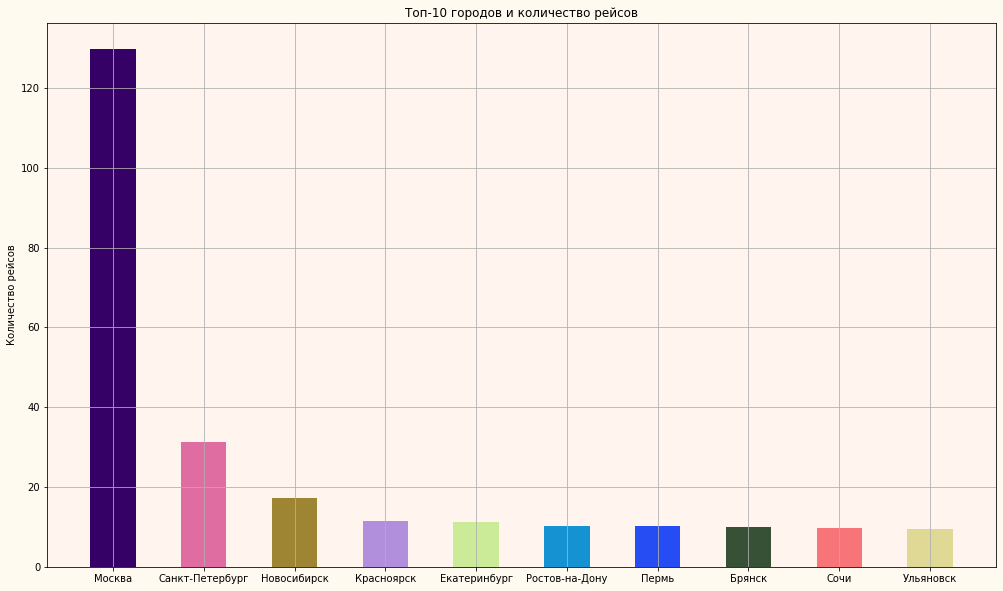

In [9]:
x = top10_cities['city']
y = top10_cities['average_flights']\

fig, ax = plt.subplots()

color_rectangle = np.random.rand(10, 3) 
ax.bar(x, y, color = color_rectangle, width = 0.5)

fig.set_figwidth(17)
fig.set_figheight(10) 

fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.title('Топ-10 городов и количество рейсов')
plt.ylabel('Количество рейсов')

plt.grid()
plt.show()

- Первое место по количеству рейсов занимает столица Москва.
- Второе место - Северная столица Санкт-Петербург.
- Далее идут города-миллионеры.
- Затем, потеснив другие миллионики, Брянск, Сочи, Ульяновск. Предположительно, это города, которые являются экономическими, транспортными (логистическими) буферами.

# Выводы:
    - Данные импортированы и изучены.
    - Типы данных в датасетах корректны.
    - Пропуски и дубликаты в данных отсутствуют.
    - Первое место по количеству прилетов ожидаемо занимает Москва. Второе место - Санкт-Петербург. Далее идут другие города-миллионики. Затем, потеснив другие миллионики, Брянск, Сочи, Ульяновск. Предположительно, это города, которые являются экономическими, транспортными (логистическими) буферами.
    - Предположительно, количество рейсов зависит от населения и экономической развитости региона. Также значение имеет транспортная инфраструктура в регионе. Однако таких данных для анализа в исходных датасетах нет.
    - Региональные, ближнемагистральные пассажирские самолёты с меньшей вместимостью делают рейсов значительно больше. Пассажирские самолёты с большей вместимостью для совершения полётов средней и большой протяжённости делают рейсов меньше.
    - У Airbus и Boeing суммарно паритет по количеству рейсов.
    - Предположу, что также влияет стоимость покупки и содержания каждой модели самолёта.
